In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
def randomPointsAroundLine(a, b):
    X = []
    Y = []
    for i in range(50):
        x = random.uniform(-1, 1)
        y = a*x + b
        X.append(x + random.uniform(-0.2, 0.2))
        Y.append(y + random.uniform(-0.2, 0.2))
    return np.array(X).reshape((-1, 1)), np.array(Y)

**Vì sao phải np.array(X).reshape((-1, 1))**

**Python**_ _ _ _ _ _ _ _ _**numpy**

[1, 2, 3, 4, 5]_ _ _ _ _[1, 2, 3, 4, 5]

mà để thực hiện hồi quy thì x phải là các vector, nghĩa là:

**numpy:**

[[1], [2], [3], [4], [5]]


còn với nhiều chiều thì không cần nữa vì nó sẵn là các vector rồi
Ví dụ:

**Python**_ _ _ _ _ _ _ _ __ _ _ __ _ _ _**numpy**

[[1,2], [3,4], [5, 6]]_ _ _ _ _ _ _ _ _[[1,2], [3,4], [5, 6]]

In [3]:
# Sinh tập dữ liệu:
X, Y = randomPointsAroundLine(1, 0)

In [4]:
X

array([[ 0.99229142],
       [-0.72642598],
       [-0.91432892],
       [ 0.57890283],
       [-0.37538798],
       [-0.17188183],
       [-0.07503869],
       [-0.67253516],
       [ 0.2345144 ],
       [-0.19645802],
       [ 0.08025688],
       [-0.08814449],
       [ 0.80220595],
       [-0.10673386],
       [ 0.70791685],
       [ 0.13034281],
       [-0.82260968],
       [-0.35788437],
       [ 0.74018077],
       [-0.53575371],
       [-0.37150063],
       [ 0.58284883],
       [ 0.55083526],
       [-0.5280582 ],
       [-0.06521505],
       [ 0.07401086],
       [ 0.33458955],
       [ 0.31200886],
       [-0.42944838],
       [-0.56168754],
       [ 0.67074989],
       [ 0.87722557],
       [ 0.03904771],
       [-0.15494138],
       [-0.74065147],
       [-0.90292853],
       [-0.36719385],
       [-1.03533138],
       [-0.48588486],
       [-0.10823495],
       [ 1.01290385],
       [-0.34141576],
       [-0.1754514 ],
       [ 0.54353509],
       [-0.15659981],
       [ 0

In [5]:
Y

array([ 0.77769284, -0.56819186, -0.88990742,  0.54198951, -0.31211003,
       -0.04583538,  0.01845338, -0.79264161,  0.2083467 , -0.13095335,
        0.10824447, -0.130601  ,  0.73415261, -0.28075698,  0.50511923,
        0.38905187, -0.61244205, -0.47886865,  0.6892864 , -0.43446494,
       -0.5409956 ,  0.66866509,  0.67274135, -0.72017958, -0.14576056,
        0.1355826 ,  0.36314132,  0.04342384, -0.3437937 , -0.45227836,
        0.42846846,  0.66159777,  0.03851416, -0.43344317, -0.40603723,
       -0.90521044, -0.48404102, -0.85523379, -0.36239124, -0.22307858,
        0.72269522, -0.46850277, -0.2995582 ,  0.54993607, -0.10563081,
        0.53311911,  0.08961165, -0.15733072, -0.48238803,  0.01455507])

In [6]:
# Phân chia thành tập học và tập test (Split the data into training/testing sets)
x_train = X[:-20] # 20 dữ liệu đầu tiên trong tổng số 50
x_test = X[-20:] # 20 dữ liệu cuối trong tổng số 50

y_train = Y[:-20] # tương tự như x
y_test = Y[-20:]

In [7]:
x_train

array([[ 0.99229142],
       [-0.72642598],
       [-0.91432892],
       [ 0.57890283],
       [-0.37538798],
       [-0.17188183],
       [-0.07503869],
       [-0.67253516],
       [ 0.2345144 ],
       [-0.19645802],
       [ 0.08025688],
       [-0.08814449],
       [ 0.80220595],
       [-0.10673386],
       [ 0.70791685],
       [ 0.13034281],
       [-0.82260968],
       [-0.35788437],
       [ 0.74018077],
       [-0.53575371],
       [-0.37150063],
       [ 0.58284883],
       [ 0.55083526],
       [-0.5280582 ],
       [-0.06521505],
       [ 0.07401086],
       [ 0.33458955],
       [ 0.31200886],
       [-0.42944838],
       [-0.56168754]])

In [8]:
x_test

array([[ 0.67074989],
       [ 0.87722557],
       [ 0.03904771],
       [-0.15494138],
       [-0.74065147],
       [-0.90292853],
       [-0.36719385],
       [-1.03533138],
       [-0.48588486],
       [-0.10823495],
       [ 1.01290385],
       [-0.34141576],
       [-0.1754514 ],
       [ 0.54353509],
       [-0.15659981],
       [ 0.46670772],
       [ 0.24185404],
       [-0.21051871],
       [-0.20425806],
       [ 0.01499353]])

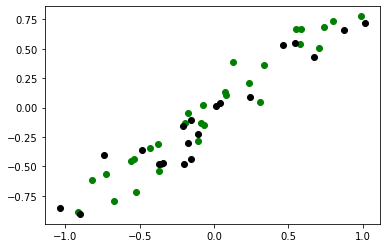

In [9]:
# Vẽ minh họa với matplotlib
plt.scatter(x_train, y_train, color='green') # bộ học
plt.scatter(x_test, y_test, color='black') # bộ test

# plt.xticks(())
# plt.yticks(())

plt.show()

In [10]:
# Tạo đối tượng LinearRegression (Create linear regression object)
regr = linear_model.LinearRegression()

In [11]:
# Học mô hình (Train the model using the training sets):
regr.fit(x_train, y_train)

LinearRegression()

In [12]:
# In tham số đã học được:
# f(x1,..,xn) = a0 + a1*x1 + a2*x2 + … +  an*xn (y = ax + b)
    # coef_ là [a1, a2,..,an] (~ a)
    # intercept_ là a0        (~ b)
print(regr.coef_, regr.intercept_)

[0.9237374] -0.007089181757012102
